# Gaussian and Difference of Gaussian Pyramid 

* Author: Johannes Maucher
* Last Update: 28th January 2021

In the previous sections two important applications of Gaussian filters, bluring and noise suppression, have been introduced. Another frequent application is to construct **Gaussian and Laplacian pyramides**. Pyramides are used to generate different sizes of an images. The levels in a pyramid differ in their scale. Different scales are required for example for implementing scale-invariant recognition. This will be elaborated in detail in the later section on **SIFT features**.    


A **Gaussian pyramide** is constructed as follows:

1. Set level index $l=0$; Set $G_{l=0}$ to be the original image
2. Smooth $G_l$ by applying a Gaussian filter
3. Downsample the smoothed $G_l$ by a factor of 2. The result is $G_{l+1}$
4. Set $l=l+1$ and continue with step 2 until $G_l$ contains only a single pixel

<img src="https://maucher.home.hdm-stuttgart.de/Pics/pyramideGauss.png" style="width:600px" align="center">

*Image Source: {cite}`Szeliski10`*

In the Gaussian pyramid in each level the input image is **low pass filtered**. Thus in each level finer structures (higher frequencies) are filtered out. At high levels $l$ only coarse structures (**low frequencies**) are represented in $G_l$. The Difference at level $l$ 

$$
D_l=G_l-G_{l+1}^{\uparrow}
$$

represents the high frequencies which are filtered out in level $l$, where $G_{l+1}^{\uparrow}$ is the upsampled (interpolated) version of $G_{l+1}$. The pyramide of all $D_l$ constitute the **Laplacian Pyramid.**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/szeBandpass.JPG" style="width:600px" align="center">

*Image Source: {cite}`Szeliski10`*

## Spectrum of 1-dimensional Gaussian and Difference Of Gaussian Filter

Below the spectrum of 

- the 3 different 1-dimensional Gaussian filters $G_{0}, G_{1}$ and $G_{2}$ 
- the Difference of Gaussian (DoG) $D_1=G_1-G_{2}^{\uparrow}$ and $D_2=G_2-G_{3}^{\uparrow}$ 

is plotted:

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.fft as sf
import scipy.ndimage as ndi
import warnings
warnings.filterwarnings("ignore")

**Function for calculating and plotting the spectral representation of a signal:**

The function below calculates the single-sided amplitude spectrum of a 1-dimensional time domain signal $y$. The sampling frequency $Fs$ is required for a correct scaling of the frequency-axis in the plot.

In [7]:
def plotSpectrum(y,Fs,title=""):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = np.arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(int(n/2))] # one side frequency range

 Y = sf.fft(y)/n # fft computing and normalization
 Y = Y[range(int(n/2))]

 plt.stem(frq,abs(Y),'r') # plotting the spectrum
 plt.title(title)
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|Y(freq)|')

**Define 1-dimensional Gaussian filter:**

In [8]:
def calcGaussian(x,m,sig):
    return np.exp(-((tf-m)/sig)**2/2)/(sig*np.sqrt(2*np.pi))

**Plot signal, filter and filtered signal in time- and frequency domain:**

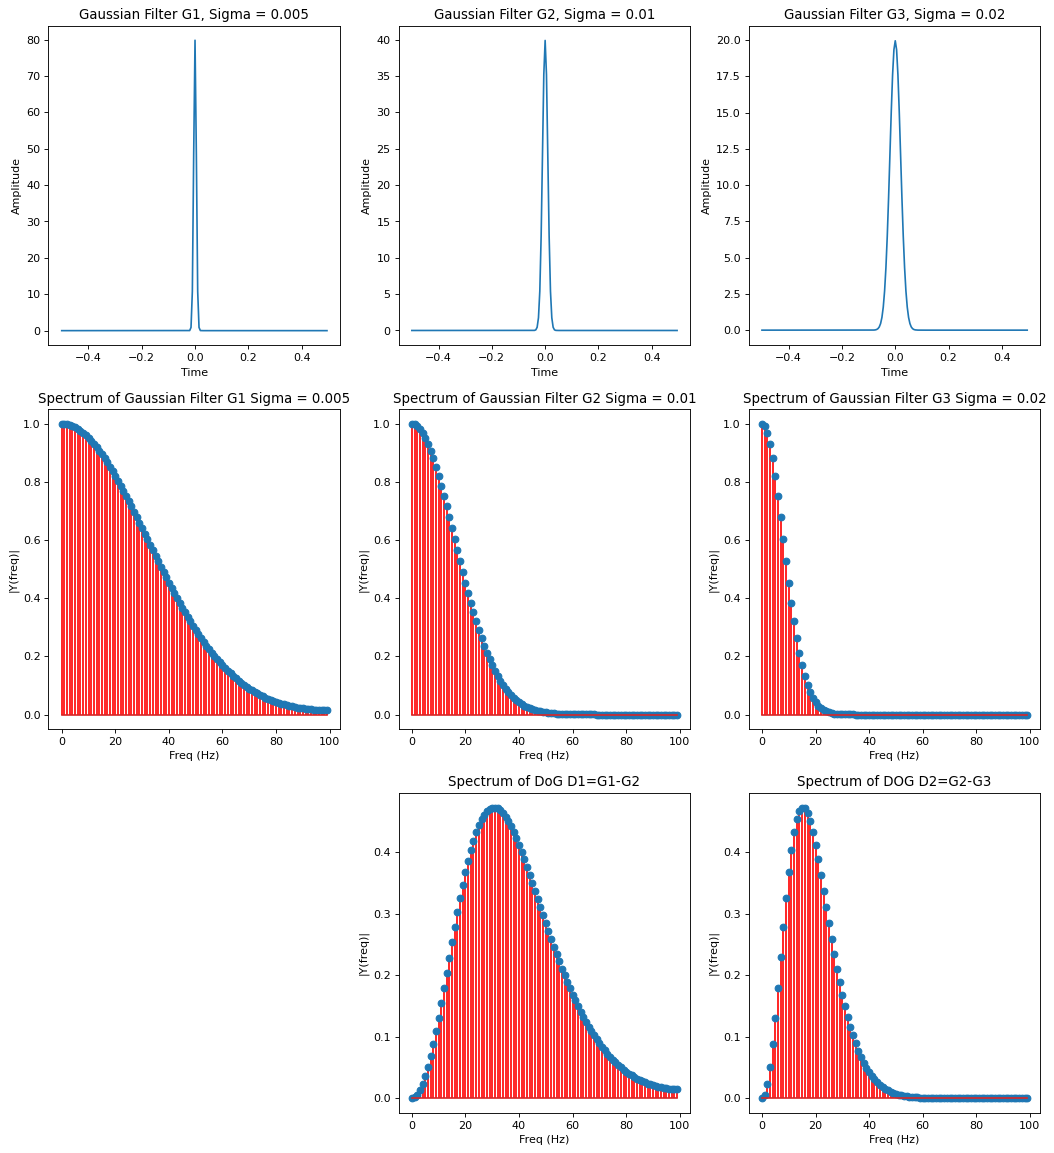

In [9]:
Fs = 200.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
tf=np.arange(-0.5,0.5,Ts) # time vector for filter
filtTitle="Gaussian Filter"
sig=0.005
m=0.0

plt.figure(num=None, figsize=(16,18), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,3,1)
filt1=calcGaussian(tf,m,sig)
plt.plot(tf,filt1)
plt.title(filtTitle + " G1, Sigma = "+str(sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)
plt.subplot(3,3,2)
filt2=calcGaussian(tf,m,2*sig)
plt.plot(tf,filt2)
plt.title(filtTitle + " G2, Sigma = "+str(2*sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)
plt.subplot(3,3,3)
filt3=calcGaussian(tf,m,4*sig)
plt.plot(tf,filt3)
plt.title(filtTitle + " G3, Sigma = "+str(4*sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(3,3,4)
plotSpectrum(filt1,Fs,title="Spectrum of "+filtTitle+ " G1 Sigma = "+str(sig))
plt.subplot(3,3,5)
plotSpectrum(filt2,Fs,title="Spectrum of "+filtTitle+ " G2 Sigma = "+str(2*sig))
plt.subplot(3,3,6)
plotSpectrum(filt3,Fs,title="Spectrum of "+filtTitle+ " G3 Sigma = "+str(4*sig))
plt.subplot(3,3,8)
plotSpectrum(filt2-filt1,Fs,title="Spectrum of DoG D1=G1-G2")
plt.subplot(3,3,9)
plotSpectrum(filt3-filt2,Fs,title="Spectrum of DOG D2=G2-G3")

## Gaussian Pyramide and Laplacian Pyramide of Images

Below the Gaussian- and the Laplacian Pyramide of a given image is calculated and visualized. For the calculations of the pyramids the functions `pyramid_gaussian()` and `pyramid_laplacian()` from [scikit-image](https://scikit-image.org/docs/0.7.0/api/skimage.transform.pyramids.html#skimage.transform.pyramids.pyramid_laplacian) are applied.   

In [16]:
#!conda install -y scikit-image

In [17]:
from skimage.transform.pyramids import pyramid_gaussian, pyramid_laplacian
import cv2
from matplotlib import pyplot as plt

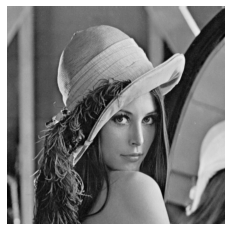

In [18]:
image = cv2.imread('../Data/lenaGrey.png',cv2.IMREAD_GRAYSCALE)
lenaGrey=image.copy()
plt.axis("off")
plt.imshow(image,cmap="gray")
plt.show()

Calculate Gaussian- and Laplacian Pyramide:

In [19]:
MAXlevel=4
gausspyramid=tuple(pyramid_gaussian(image, max_layer=MAXlevel, downscale=2, sigma=None, order=1, mode='reflect', cval=0))
laplacianpyramid=tuple(pyramid_laplacian(image, max_layer=MAXlevel, downscale=2, sigma=None, order=1, mode='reflect', cval=0))

Visualize the pyramids:

In [20]:
titles=["Original",
        "Diff between Original and Smoothed 1",
        "Smoothed 1",
        "Diff between Smoothed 1 and Smoothed 2",
        "Smoothed 2",
        "Diff between Smoothed 2 and Smoothed 3",
        "Smoothed 3",
        "Diff between Smoothed 3 and Smoothed 4",
       ]

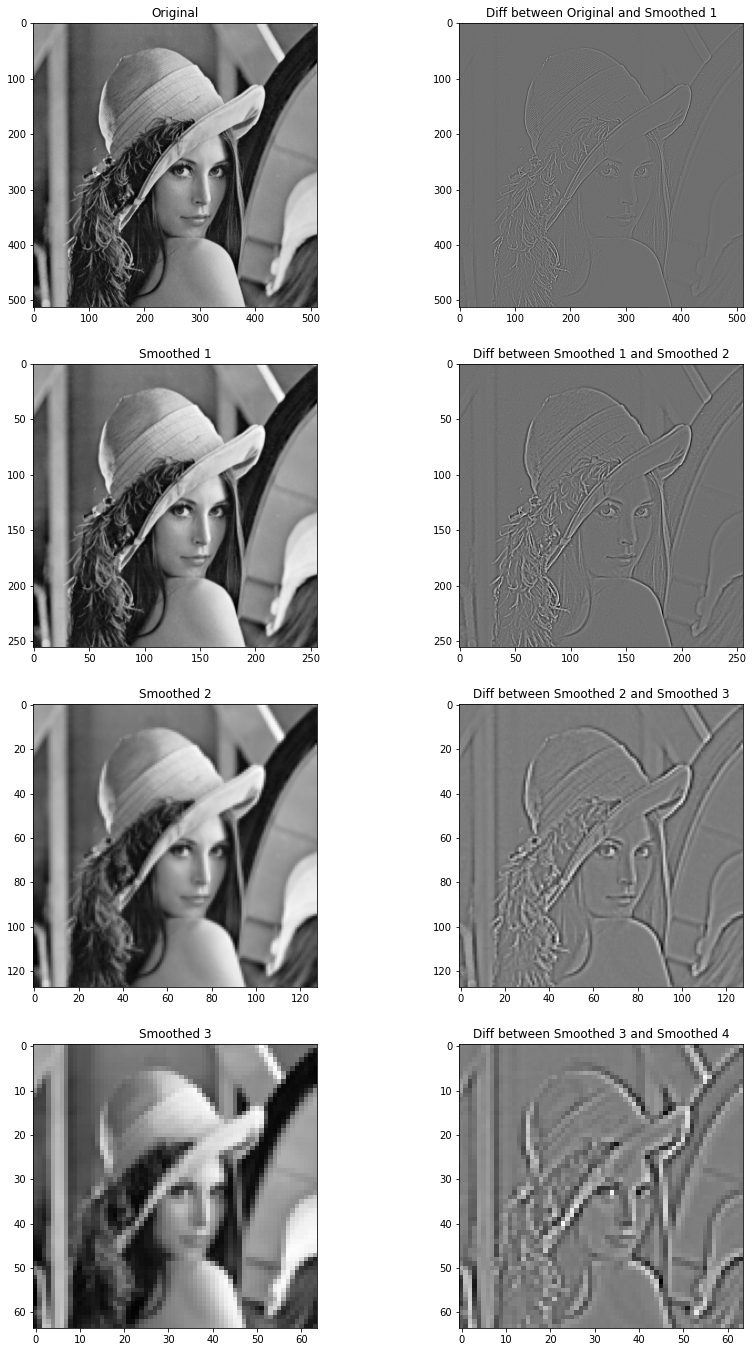

In [21]:
idx=1
plt.figure(figsize=(14,24))
for level in range(MAXlevel):
    plt.subplot(MAXlevel,2,idx)
    plt.imshow(gausspyramid[level],cmap="gray")
    plt.title(titles[idx-1])
    idx+=1
    plt.subplot(MAXlevel,2,idx)
    plt.imshow(laplacianpyramid[level],cmap="gray")
    plt.title(titles[idx-1])
    idx+=1

In the left column of the picture above the Gaussian pyramide, in the right column the Laplacian pyramide is shown (both upsidedown).